# Calculando Retornos Financeiros

In [18]:
import quandl
import numpy as np

### Os retornos representam a variação percentual do valor absoluto de um ativo financeiro

Retornos Aritméticos

<font size="5"> $ rt= \frac{S_{t} − S_{t−1}}{S_{t−1}}$ </font>

Retornos Logaritimicos

<font size="5"> $ rt= ln\frac{S_{t}}{S_{t−1}}$ </font>


onde <font size="4"> $S_{t}$ </font> é o valor absoluto do ativo no instante t. 

### Cálculo dos retornos aritiméticos

Para o calculro dos retornos vamos considerar um ativo <font size="2"> $S_{t}$ </font> que representa o seu valor absoluto no instante t. Nesse estudo vamos usar os dados IBOVESPA com frequência mensal, onde cada valor é referente ao preço de fechamento do índice no último dia útil de cada mês.

In [19]:
# Download da série mensal do IBOVESPA
data = quandl.get("BCB/7845", trim_start="2009-01-01")
data.head()

,Value
Date,
2009-01-31,39300.0
2009-02-28,38183.0
2009-03-31,40926.0
2009-04-30,47289.0
2009-05-31,53197.0


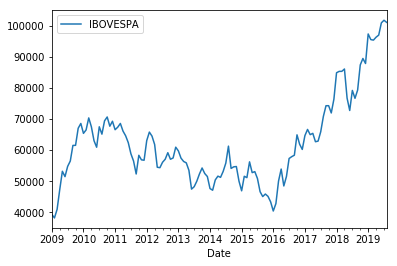

In [20]:
# Renomear a série
data.columns = ['IBOVESPA']
# Visualizar a série temporal
data.plot()

Vamos definir a série <font size="2"> $S_{t}$ </font>, pois para efetuar o calculo é preciso fazer a conta <font size="2"> $S_{t} - S_{t-1}$ </font> e dividir por <font size="2"> $S_{t-1}$ </font>. 

In [21]:
data["IBOVESPA_Ret_Aritmético"] = data["IBOVESPA"].diff()/data["IBOVESPA"].shift(1)
data.head()

,IBOVESPA,IBOVESPA_Ret_Aritmético
Date,,
2009-01-31,39300.0,NaN
2009-02-28,38183.0,-0.028422
2009-03-31,40926.0,0.071838
2009-04-30,47289.0,0.155476
2009-05-31,53197.0,0.124934


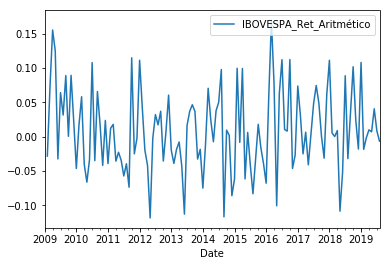

In [22]:
data[["IBOVESPA_Ret_Aritmético"]].plot()

### Cálculo dos retornos logaritimicos

O logaritmo geralmente é usado para transformar séries que tem valores com crescimentos exponenciais em séries com crescimentos mais lineares, neste estudo usaremos o Logaritmo Natural (LN), onde a base é 2,718, este tipo de logaritmo é bastante usado em modelos econômicos. O cálculo dos log-retornos, fica mais simples se fizermos uma transformação na fórmula usando uma propriedade do logarítimo

<font size="5"> $ln\frac{S_{t}}{S_{t-1}} = lnS_{t} - lnS_{t-1} $ </font>

In [23]:
data["IBOVESPA_Ret_Logarítmico"] = np.log(data["IBOVESPA"]).diff()
data.head()

,IBOVESPA,IBOVESPA_Ret_Aritmético,IBOVESPA_Ret_Logarítmico
Date,,,
2009-01-31,39300.0,NaN,NaN
2009-02-28,38183.0,-0.028422,-0.028834
2009-03-31,40926.0,0.071838,0.069375
2009-04-30,47289.0,0.155476,0.144512
2009-05-31,53197.0,0.124934,0.117724


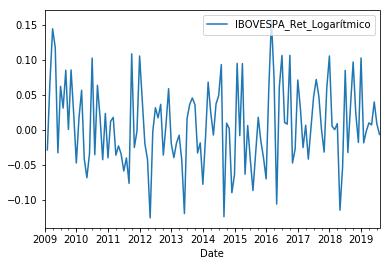

In [24]:
data[["IBOVESPA_Ret_Logarítmico"]].plot()

<font size="3"> Não muita diferença nos valores dos retornos, porém em finanças é mais comum a utilização dos log-retornos devido a simplicidade para efetuar calculo. <font>

# Análise de Séries Temporais

<font size="3"> A maioria dos métodos de previsão estatística assume que as séries temporais são aproximadamente estacionárias. Como você pode determinar se uma série temporal é estacionária? <font>

### Séries estacionárias vs Não estacionárias

<font size="3"> Em uma série temporal estacionária, propriedades estatísticas como média e variância são constantes ao longo do tempo. Em uma série não estacionária, essas propriedades dependem do tempo. Séries temporais que possuem tendência e/ou sazonalidade não são estacionárias e é necessário o uso de técnicas adequadas a tal situação.<br>
 A classe dos modelos ARIMA será capaz de descrever de maneira satisfatória séries estacionárias e séries não estacionárias que não apresentem um comportamento explosivo.    
 <font>

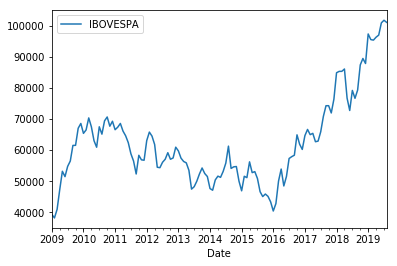

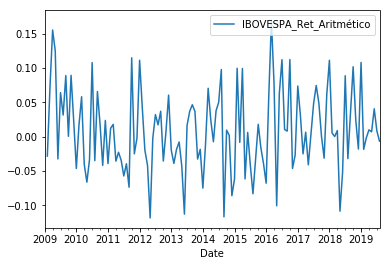

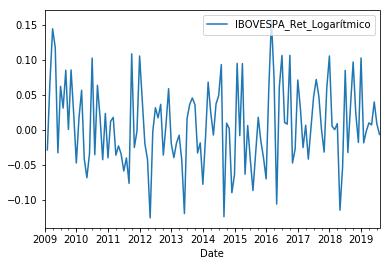

In [25]:
data[["IBOVESPA"]].plot()
data[["IBOVESPA_Ret_Aritmético"]].plot()
data[["IBOVESPA_Ret_Logarítmico"]].plot()

## Teste Estatístico de Dickey-Fuller Aumentado (ADF)

Para determinar se uma série temporal é estacionária ou não, usaremos o teste do ADF, que é um tipo de teste de raiz unitária . As raízes unitárias são uma causa de não estacionariedade; o teste do ADF testará se a raiz unitária está presente. <br>

As hipóteses nula e alternativa do teste de Dickey-Fuller aumentado são definidas da seguinte forma:

<b>Hipótese nula afirma que há presença de uma raiz unitária.<b> <br>

Hipótese alternativa afirma que  não há raiz unitária. Em outras palavras, a estacionariedade existe.

A função adfuller retorna uma tupla de estatísticas do teste do ADF, como Estatística do teste Valor-P; Número de defasagens usadas; Número de observações usadas para a regressão do ADF e um dicionário de Valores críticos.  <br>

Se o valor P for menor que o nível de significância definido, rejeitamos a hipótese nula de que a série temporal contém uma raiz unitária. Em outras palavras, rejeitando a hipótese nula, podemos concluir que a série temporal é estacionária.  <br>

Se o Valor-P estiver muito próximo do seu nível de significância, você poderá usar os Valores críticos para ajudá-lo a chegar a uma conclusão sobre a estacionariedade de suas séries temporais.

In [26]:
#Statsmodels é um módulo Python que fornece funções e classes para a estimativa de muitos modelos estatísticos. A função para executar o ADF é chamada adfuller .
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from matplotlib import pyplot as plt

### Teste de estacionáridade da série da Ibovespa

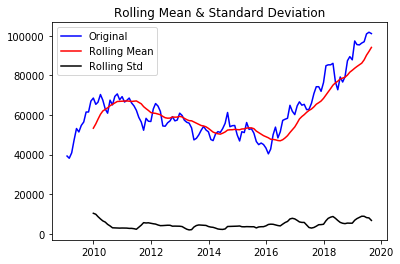

Results of Dickey-Fuller Test:
Augmented Dickey-Fuller Test Results:
Test Statistic                  -0.527558
p-value                          0.886526
#Lags Used                       0.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64
None


In [27]:
from statsmodels.tsa.stattools import adfuller

def st_check(timeseries):   
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    
    #rolmean = pd.rolling_mean(timeseries, window=12) ## as month is year divide by 12
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std  = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    #Add Critical Values
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print('Augmented Dickey-Fuller Test Results:')
            
    print (dfoutput)
    
print(st_check(data["IBOVESPA"]))

Nesse caso, é fácil ver que a série não é estacionária. O Valor-P de 0,88 é maior que nosso nível de significância de 5%, portanto, não rejeitamos a hipótese nula, de que a raiz unitária existe.  

Outra maneira de interpretar esse teste é usar o valor crítico que chega a -0,52. Isso é maior que o valor crítico de 5% de -2,8 e, portanto, não rejeitamos a hipótese nula.

In [28]:
data = data.dropna(inplace=False)

### Testando se a série de Retorno Aritmético da Ibovespa é estacionária

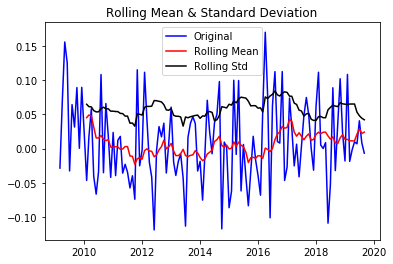

Results of Dickey-Fuller Test:
Augmented Dickey-Fuller Test Results:
Test Statistic                -8.638143e+00
p-value                        5.518673e-14
#Lags Used                     1.000000e+00
Number of Observations Used    1.250000e+02
Critical Value (1%)           -3.483779e+00
Critical Value (5%)           -2.884954e+00
Critical Value (10%)          -2.579257e+00
dtype: float64
None


In [29]:
print(st_check(data["IBOVESPA_Ret_Aritmético"]))

Como esperado, os resultados mostram que a série é realmente estacionária. Nesse caso, o valor P de nosso teste de ADF é muito menor que nosso nível de significância de 5%; portanto, podemos rejeitar a hipótese nula e, em vez disso, aceitar a hipótese alternativa de que existe estacionariedade. 

O valor crítico dos testes acaba sendo -8,63, que é muito menor que o valor crítico de 5% de -2,88 e, portanto, temos evidências suficientes para concluir que a raiz da unidade não existe. Em outras palavras, a série é estacionária

### Testando se a série de Retorno Logaritmo da Ibovespa é estacionária

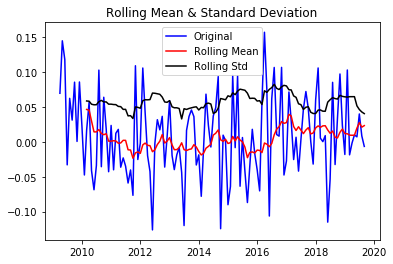

Results of Dickey-Fuller Test:
Augmented Dickey-Fuller Test Results:
Test Statistic                -8.846839e+00
p-value                        1.612152e-14
#Lags Used                     1.000000e+00
Number of Observations Used    1.240000e+02
Critical Value (1%)           -3.484220e+00
Critical Value (5%)           -2.885145e+00
Critical Value (10%)          -2.579359e+00
dtype: float64
None


In [31]:
ts_log=np.log(data["IBOVESPA"])
ts_log_dif = ts_log - ts_log.shift()
ts_log_dif.dropna(inplace=True)
print(st_check(ts_log_dif))

Novamente, os resultados mostram que a série é estacionária. Nesse caso, o valor P de nosso teste de ADF é muito menor que nosso nível de significância de 5% e, além disso, o valor crítico dos testes acaba sendo -8,65, que é muito menor que o valor crítico de 5% de -2,88 e, portanto, temos evidências suficientes para concluir que a raiz da unidade não existe. Em outras palavras, a série é estacionária.

### Por que as séries de retornos finaceiros são estacionárias?  Diferenciação!

Uma das primeiras manobras para reduzir a tendência pode ser transformação. Um dos métodos mais comuns de lidar tanto com tendência quanto sazonalidade é a diferenciação. Nessa técnica, tomamos a diferença de observação em um instante particular com a do instante anterior. Isso funciona particularmente bem para estacionaridade crescente. 

## Forecast de uma Série Temporal Estacionária

A previsão ARIMA para uma série temporal estacionária é nada mais que uma equação linear (como uma regressão linear). Os preditores dependem dos parâmetros (p, d, q) do modelo ARIMA:<br>

1- Número de termos AR (auto-regressivo) (p): termos AR são apenas defasagens da variável dependente. Por exemplo, se o símbolo p representa 5, os preditores de x(t) serão X(t-1) … .x(T-5).<br>

2-  Número de termos MA (média móvel) (q): termos MA são erros de previsão defasados na equação de projeção. Por exemplo, se q é 5, os preditores para x(t) serão E(t-1) … .e(t-5) onde e(i) é a diferença entre a média móvel no instante i e o valor real.<br>

3- Número de Diferenças (d): Estes são o número de diferenças não sazonais, ou seja, neste caso, tomamos a diferença de primeira ordem. Assim, ou nós podemos passar essa variável e colocar d = 0, ou passar a variável original e colocar d = 1. Ambos irão gerar mesmos resultados.

### Funções ACF e PACF

Para saber quantos termos utilizar no treino de seu modelo, você irá fazer uso de duas funções muito úteis: a Função de Autocorrelação (ACF) e a Função de Autocorrelação Parcial (PACF). <br>

O conceito de auto correlação é uma condição para se criar previsões com uma única variável, pois caso não exista, não podemos usar valores passados para prever o futuro, quando existem diversas variáveis, pode-se verificar se há correlação entre a variável dependente e os lags das variáveis independentes. <br>

Para ter previsibilidade uma série com uma única variável deve ser auto correlacionada, ou seja, o período atual deve ter explicação com base em um período anterior (lag). <br>

Caso uma série não tenha auto correlação ela é uma série com sequências aleatória e imprevisíveis e a melhor maneira de se fazer uma previsão normalmente é usar o valor do dia anterior. <br>

Uma outra função extremamente importante é a função de auto correlação parcial, onde o efeito do lag anterior sobre o período atual é removido e só resta o efeito do lag analisado sobre o período atual, exemplo: a auto correlação parcial do quarto lag irá remover o efeito do primeiro, segundo e terceiro lag. <br>

Um detalhe extremamente importante sobre encontrar lags correlacionados para criar previsões é que haja uma razão para que esta correlação exista, pois caso não haja alguma razão lógica é possível que seja só o acaso ou que a parte que está sendo analisada apresentou esta correlação, podendo mudar ao analisar outra parte da série. <br>

Outro ponto importante é que os gráficos de auto correlação e autocorrelação parcial são muito sensíveis à pontos fora da curva (outliers), assim, é importante que se analise o gráfico da série normal para conferir com os dois gráficos de correlação. <br>

A seguir temos analise dos dois gráficos de ACF e PACF. <br>

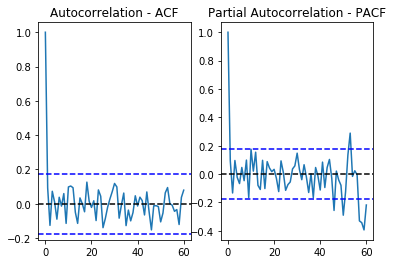

In [53]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(ts_log_dif,nlags=60)
lag_pacf = pacf(ts_log_dif,nlags=60,method='ols')

######################### ACF ##########################################

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_dif)),linestyle='--',color='blue')
plt.axhline(y=1.96/np.sqrt(len(ts_log_dif)),linestyle='--',color='blue')
plt.title('Autocorrelation - ACF')


######################### PACF ##########################################

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_dif)),linestyle='--',color='blue')
plt.axhline(y=1.96/np.sqrt(len(ts_log_dif)),linestyle='--',color='blue')
plt.title('Partial Autocorrelation - PACF')
plt.show()

Quantidade de termos em p <br>

Ambos os gráficos terão o primeiro "pico" com valor 1. Para sabermos o quantos de termos AR precisaremos, vamos olhar para o gráfico de ACF e analisar se houve uma queda exponencial. Se sim, vamos olhar para o gŕafico de PACF e contar quantos "picos" passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa. <br>

Quantidade de termos em q <br>

Um processo muito semelhante é feito para saber a quantidade de termos q. Vamos olhar para o gráfico de PACF e analisar se houve uma queda exponencial. Se sim, vamos olhar para o gŕafico de ACF e contar quantos "picos" passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa.<br>

Agora, vamos fazer 3 modelos ARIMA diferentes, considerando efeitos individuais bem como efeitos combinados. Note que o RSS é para os valores de resíduos e não para série real.<br>

### Modelos AR, MA e ARIMA 

C:\Users\Rodrigo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Rodrigo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Rodrigo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Rodrigo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Rodrigo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Us

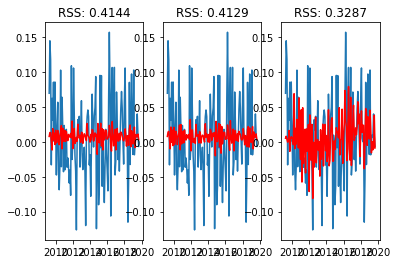

In [34]:
from statsmodels.tsa.arima_model import ARIMA

## AR
plt.subplot(131)
model = ARIMA(ts_log,order=(2,1,0))
result_AR = model.fit(disp=-1)
plt.plot(ts_log_dif)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-ts_log_dif)**2))

## MA
plt.subplot(132)
model = ARIMA(ts_log,order=(0,1,2))
result_MA = model.fit(disp=-1)
plt.plot(ts_log_dif)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-ts_log_dif)**2))

## ARIMA
plt.subplot(133)
model = ARIMA(ts_log,order=(16,1,12))
result_MA = model.fit(disp=-1)
plt.plot(ts_log_dif)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-ts_log_dif)**2))
plt.show()


Aqui podemos ver que os modelos AR e MA têm quase a mesma RSS, mas combinado é significativamente melhor. Agora, ficamos com um último passo, ou seja, trazer esses valores de volta para a escala original.

In [35]:
# O primeiro passo seria para armazenar os resultados previstos como uma série separada e observá-la.
pred_arima_dif = pd.Series(result_MA.fittedvalues,copy=True)

#A maneira de converter a diferenciação de escala logarítmica é adicionar essas diferenças consecutivamente ao número base. 
#Uma maneira fácil de fazer isso é primeiro determinar a soma cumulativa no índice e, em seguida, adicioná-la ao número base.


arima_dif_cumsum = pred_arima_dif.cumsum()

#Em seguida temos que adicioná-los ao número base. Para isso, vamos criar uma série com todos os valores como número base e adicionar as diferenças a ela. 
#Isto pode ser feito como:

pred_arima_log = pd.Series(ts_log.ix[0], index=ts_log.index)
pred_arima_log = pred_arima_log.add(arima_dif_cumsum,fill_value=0)
print(pred_arima_log.head())

#O último passo é tomar o expoente e comparar com a série original.

pred = np.exp(pred_arima_log)

Date
2009-02-28    10.550146
2009-03-31    10.555212
2009-04-30    10.563074
2009-05-31    10.566463
2009-06-30    10.565958
dtype: float64


C:\Users\Rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


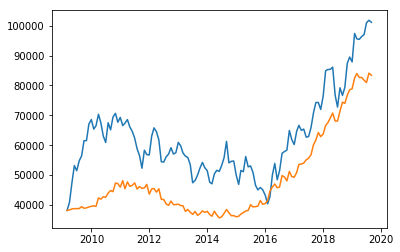

In [36]:
plt.plot(data["IBOVESPA"])
plt.plot(pred)
plt.show()

In [37]:
pred.head()

Date
2009-02-28    38183.000000
2009-03-31    38376.923197
2009-04-30    38679.832052
2009-05-31    38811.171384
2009-06-30    38791.552756
dtype: float64

Neste artigo abordamos metogologias de retornos financeiros e problemas de séries temporais. Conceitos de estacionaridade, Teste Dickey-Fuller para estacionaridade e, finalmente, prever os retornos. <br>

Modelos de séries temporais têm suas próprias particularidades, devendo elas serem analisadas para podermos extrair o máximo de informação possível e consequentemente fazermos boas previsões para reduzir a incerteza do futuro. <br>

No próximo artigo vamos discutir mais sobre modelos ARIMA, validar na base de testes, checar o erros, etc.

Para mais informações sobre modelos discutidos, acesse o link abaixo: <br>
https://www.ime.usp.br/~chang/home/mae325/MAE0518-Modelagem%20em%20series%20temporais%20financeiras/aulas/MAE0518-aula09.pdf
https://www.ime.unicamp.br/~hlachos/MaterialSeries.pdf